# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


In [1]:
from time import time as tm
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    if n % 2 == 0 and n > 1:
        raise Exception("n should be divisible by 2")
    A= np.zeros((n+2,n+2))
    middle = int(n/2) + 1
    A[middle,middle] = 1
    for i in range(middle+1):
        a = np.arange((i)*2)+((i)**2-(i-1)**2)**2+1
        if i>0:
            A[middle-i,middle-i:middle+i]= a[::-1]
            a += i*2
            A[middle-i+1:middle+i+1,middle-i]= a
            a += i*2
            A[middle+i,middle-i+1:middle+i+1]= a
            a += i*2
            A[middle-i:middle+i,middle+i]= a[::-1]
        
    return(A[1:-1, 1:-1])
    pass 

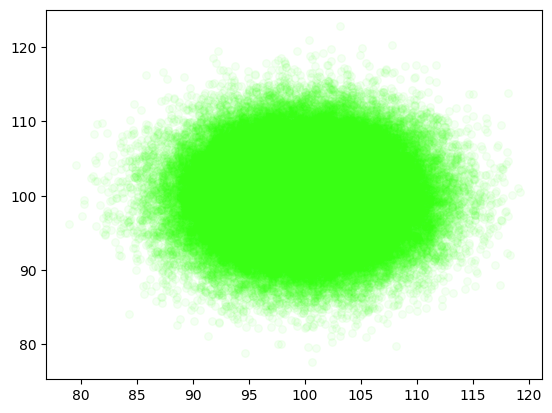

In [60]:
my_points_x = np.random.normal(100, 5, 100000)
my_points_y = np.random.normal(100, 5, 100000)
plt.scatter(my_points_x, my_points_y,c="#39ff14", s=30,alpha=0.05)



2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


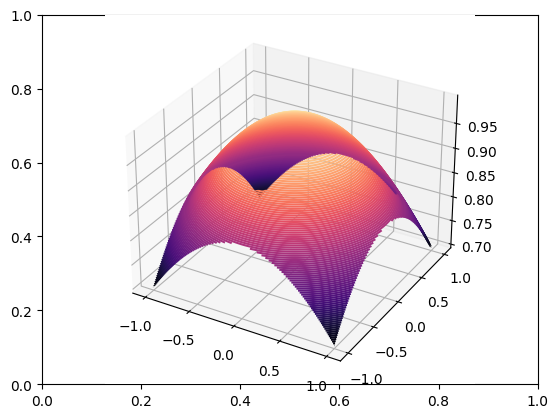

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots()
x = np.linspace(-1,1, 500)
y = np.linspace(-1,1, 500)
X_dim , Y_dim = np.meshgrid(x,y)
Z_dim = np.sin(np.sqrt(X_dim**2+Y_dim**2))/np.sqrt(X_dim**2 + Y_dim**2)
ax = plt.axes(projection='3d')
ax.contour3D(X_dim, Y_dim, Z_dim, 100, cmap='magma')
plt.show()
ax.plot_surface(X_dim, Y_dim, Z_dim, cmap='magma')
plt.show()

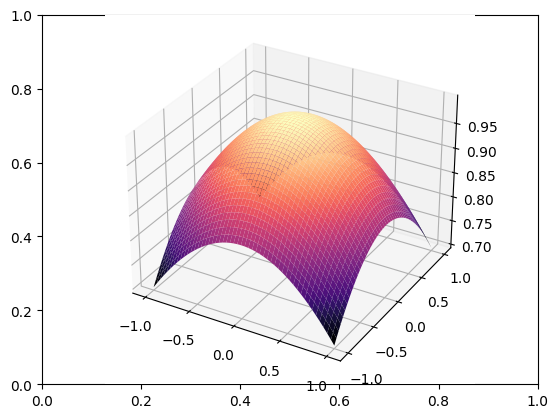

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots()
x = np.linspace(-1,1, 500)
y = np.linspace(-1,1, 500)
X_dim , Y_dim = np.meshgrid(x,y)
Z_dim = np.sin(np.sqrt(X_dim**2+Y_dim**2))/np.sqrt(X_dim**2 + Y_dim**2)
ax = plt.axes(projection='3d')
ax.plot_surface(X_dim, Y_dim, Z_dim, cmap='magma')
plt.show()


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


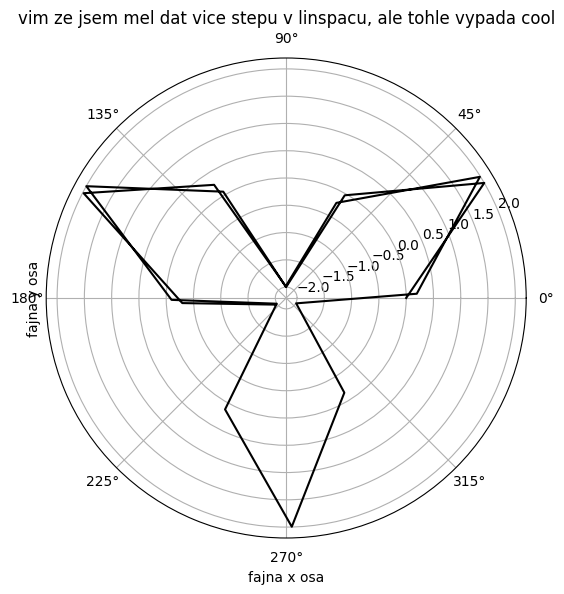

In [7]:
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0,1 ,1 ], polar=True)
x = np.linspace(0,10,20)
y= 2 * np.sin(3*x)
ax.set_xlabel("fajna x osa")
ax.set_ylabel("fajna y osa")
ax.set_title("vim ze jsem mel dat vice stepu v linspacu, ale tohle vypada cool")
ax.plot(x,y,color="#000000")


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


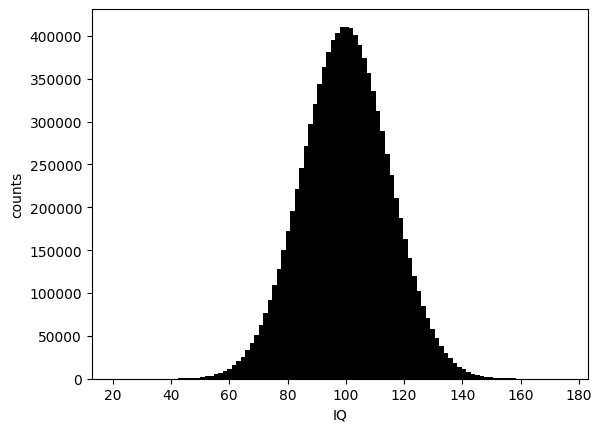

In [8]:

fig ,ax = plt.subplots()
my_points_x = np.random.normal(100, 15, 10000000)
plt.hist(my_points_x, bins= 100, color="#000000")
ax.set_xlabel("IQ")
ax.set_ylabel("counts")
plt.show()



5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


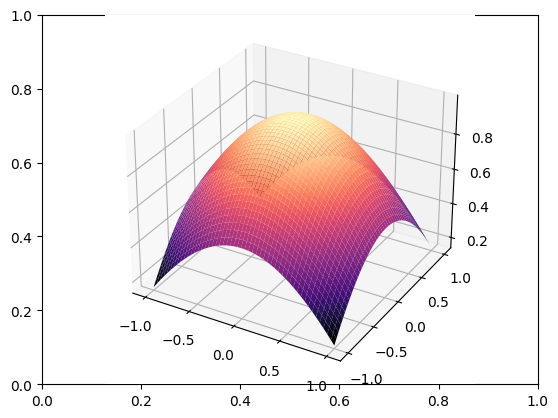

In [9]:
fig, ax = plt.subplots()
x = np.linspace(-1,1, 500)
y = np.linspace(-1,1, 500)
X_dim , Y_dim = np.meshgrid(x,y)
Z_dim = np.cos(np.sqrt(X_dim**2+Y_dim**2))
ax = plt.axes(projection='3d')
ax.plot_surface(X_dim, Y_dim, Z_dim, cmap='magma')
plt.show()

# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [10]:
np_tm = []
cl_tm = []

for i in range(7,1002,2):
    t1=tm()
    integer_spiral_numpy(i)
    t2=tm()
    np_tm.append(t2-t1)
    t1=tm()
    integer_spiral(i)
    t2=tm()
    cl_tm.append(t2-t1)

Text(0.65, 0.25, 'Vektorizovany fill')

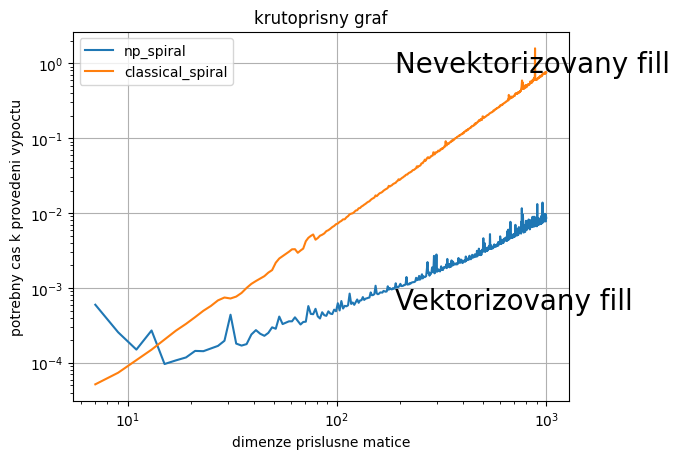

In [52]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("potrebny cas k provedeni vypoctu")
ax.set_xlabel("dimenze prislusne matice")
ax.set_title("krutoprisny graf")
ax.plot(np.arange(7,1002,2),np_tm,label= "np_spiral")
ax.plot(np.arange(7,1002,2), cl_tm,label="classical_spiral")
ax.legend(loc=2)
ax.grid(True)
ax.text(0.65, 0.95, "Nevektorizovany fill", transform=ax.transAxes, fontsize=20,
        verticalalignment='top')
ax.text(0.65, 0.25, "Vektorizovany fill", transform=ax.transAxes, fontsize=20,
        verticalalignment="baseline")

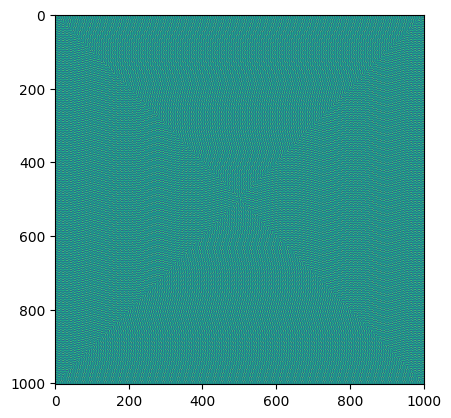

In [12]:
#moc nechapu zadani ohledne spirali a jejiho sinu, snad je tohle 
spiral = integer_spiral_numpy(1003)
sin_spiral = np.sin(spiral)
plt.imshow(sin_spiral)

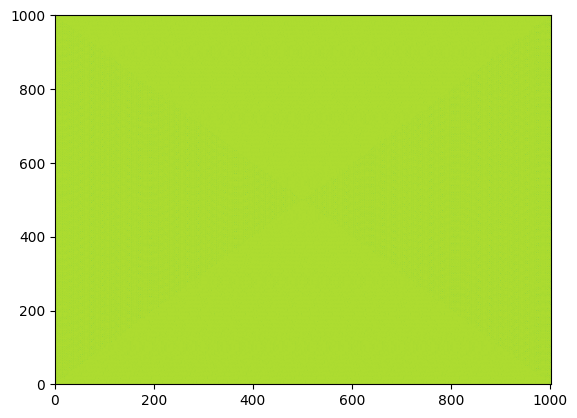

In [13]:
plt.contour(np.sin(spiral))

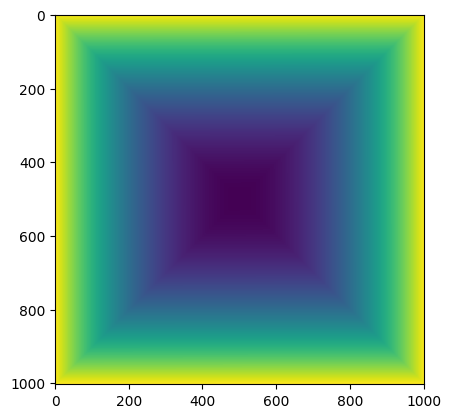

In [14]:
plt.imshow(spiral)

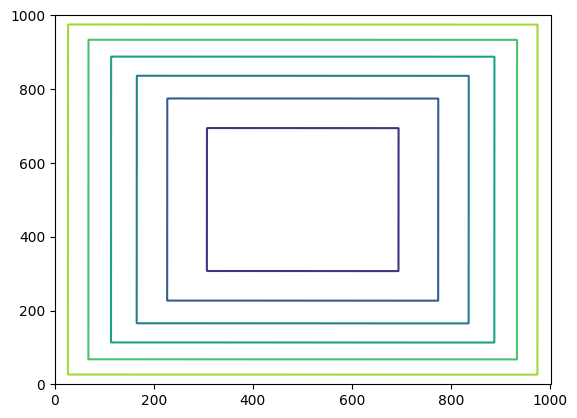

In [15]:
plt.contour(spiral)

# odpovedi na otazky

## vypocetni slozitost
Z grafu je patrne, ze numpy spirale trva vyrazne kratsi cas na vypocet a tato propast se se zvysujici se dimenzi matice zvetsuje. 

## linearni sklon v log-log meritku

Vypovida o exponencialni zavislosti

Pokud obe maji linearni sklon, pak ta s vetsim sklonem ma vetsi koeficient v exponentu, tzn. v klasickem grafu by ustrelila do nebes rychleji

UPDATE: podle hintu po pár triviálních úpravách dostaneme f(x) = x^a, kde a je sklon v log-log grafu

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.

In [64]:
smernice_np, offset_np =np.polyfit((np.arange(7,1002,2)),(np_tm), 1)

In [65]:
smernice_cl, offset_cl = np.polyfit((np.arange(7,1002,2)),(cl_tm), 1)

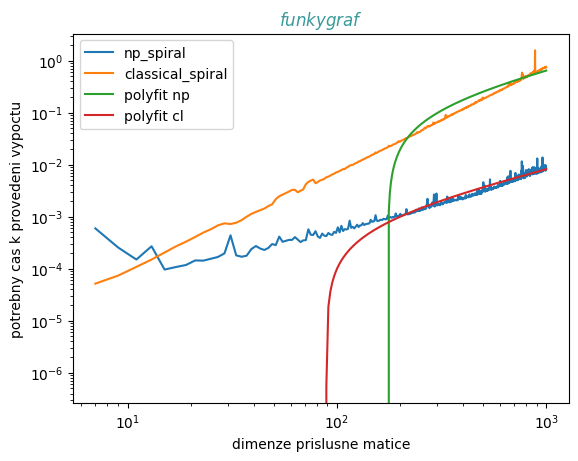

In [67]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("potrebny cas k provedeni vypoctu")
ax.set_xlabel("dimenze prislusne matice")
ax.set_title("$funky graf$", color ="#399999")
ax.plot(np.arange(7,1002,2),np_tm,label= "np_spiral")
ax.plot(np.arange(7,1002,2), cl_tm,label="classical_spiral")
ax.plot(np.arange(7,1002,2),smernice_cl* np.arange(7,1002,2) + offset_cl,label= "polyfit np")
ax.plot(np.arange(7,1002,2), smernice_np* np.arange(7,1002,2) + offset_np,label="polyfit cl")
ax.plot()
ax.legend(loc=2)

In [19]:
smernice_np, offset_np =np.polyfit(np.log10(np.arange(7,1002,2)),np.log10(np_tm), 1)
smernice_cl, offset_cl = np.polyfit(np.log10(np.arange(7,1002,2)),np.log10(cl_tm), 1)

In [20]:
print(smernice_np, offset_np)
print(smernice_cl, offset_cl)

1.0697609601269638 -5.3536382829504054
1.9944346192552775 -6.112139860646679
